In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим очищенную выборку. Можете использовать данные из прошлой лабораторной работы

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Введение в нейронные сети/Занятие 6/train.csv',index_col='PassengerId')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,Male,22.0,1,0,7.2500,3
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,3
4,1,1,female,35.0,1,0,53.1000,3
5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
887,0,2,Male,27.0,0,0,13.0000,3
888,1,1,female,19.0,0,0,30.0000,3
889,0,3,female,60.0,1,2,23.4500,3


In [3]:
dft = pd.read_csv('/content/drive/MyDrive/Введение в нейронные сети/Занятие 6/test.csv',index_col='PassengerId')
dft

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Выполняем очистку тестового набора

In [4]:
dft.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,Q
893,1,3,female,47.0,1,0,7.0000,S
894,0,2,male,62.0,0,0,9.6875,Q
895,0,3,male,27.0,0,0,8.6625,S
896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,8.0500,S
1306,1,1,female,39.0,0,0,108.9000,C
1307,0,3,male,38.5,0,0,7.2500,S


In [5]:
emb_scale = {'Q': 2, 'C': 1, 'S': 3, np.nan: 1}
dft['Embarked'] = dft['Embarked'].replace(emb_scale)
dft['Age'] = dft['Age'].fillna(28)
dft['Fare'] = dft['Fare'].fillna(0)
print(dft.isna().sum())
dft

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


<ipython-input-5-1d20a862de8c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dft['Embarked'] = dft['Embarked'].replace(emb_scale)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,2
893,1,3,female,47.0,1,0,7.0000,3
894,0,2,male,62.0,0,0,9.6875,2
895,0,3,male,27.0,0,0,8.6625,3
896,1,3,female,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
1305,0,3,male,28.0,0,0,8.0500,3
1306,1,1,female,39.0,0,0,108.9000,1
1307,0,3,male,38.5,0,0,7.2500,3


Склеим наборы, так как данные теста содержат только выживщих женщин и погибших мужчин - проверьте это!

In [6]:
df=pd.concat([df,dft])

Проверим пропуски

In [7]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Выполним замену признака Пол на числовые значения любым способом, например,

In [8]:
sex_scale = {'female': 1, 'male': 0, 'Male': 0, 'Female': 1}
df['Sex'] = df['Sex'].replace(sex_scale)
df

<ipython-input-8-41e6c43193f4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(sex_scale)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,3
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,3
4,1,1,1,35.0,1,0,53.1000,3
5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
1305,0,3,0,28.0,0,0,8.0500,3
1306,1,1,1,39.0,0,0,108.9000,1
1307,0,3,0,38.5,0,0,7.2500,3


Построим матрицу корреляции

<Axes: >

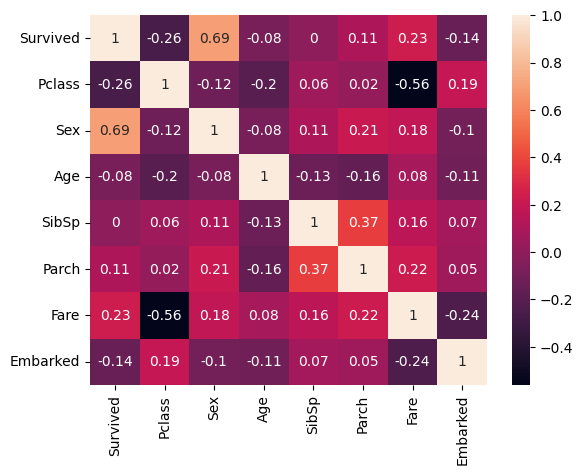

In [9]:
dfc=df.corr().round(2)
sns.heatmap(data=dfc,annot=True)

Выделим целевой признак

In [10]:
Y=df['Survived']
Y

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
1305,0
1306,1
1307,0


Остальное - Х

In [11]:
X=df.drop(['Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,3
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,3
4,1,1,35.0,1,0,53.1000,3
5,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
1305,3,0,28.0,0,0,8.0500,3
1306,1,1,39.0,0,0,108.9000,1
1307,3,0,38.5,0,0,7.2500,3


разделим  датасет на train и test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [13]:
X_train.shape

(1176, 7)

Создадим модель DecisionTree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(random_state=0)
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

Построим матрицу ошибки

In [15]:
df1=pd.crosstab(Y_test,pred_1)
df1

col_0,0,1
Survived,,
0,76,8
1,15,32


Выполним оценку

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))

accuracy 0.8244274809160306
precision 0.8
recall 0.6808510638297872


Общий отчёт, проанализируйте результат - требуется доработка!!

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        84
           1       0.80      0.68      0.74        47

    accuracy                           0.82       131
   macro avg       0.82      0.79      0.80       131
weighted avg       0.82      0.82      0.82       131



Построим кривые ROC

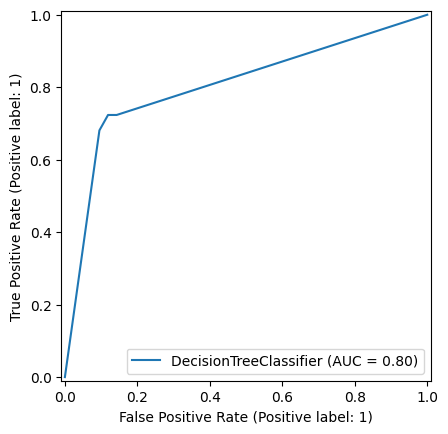

In [18]:
from sklearn.metrics import RocCurveDisplay
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

**Выводим важность признаков в этой модели**

In [19]:
dtf.feature_importances_

array([0.06064187, 0.49788065, 0.16924894, 0.02386817, 0.02637836,
       0.20814403, 0.01383798])

**Строим дерево**

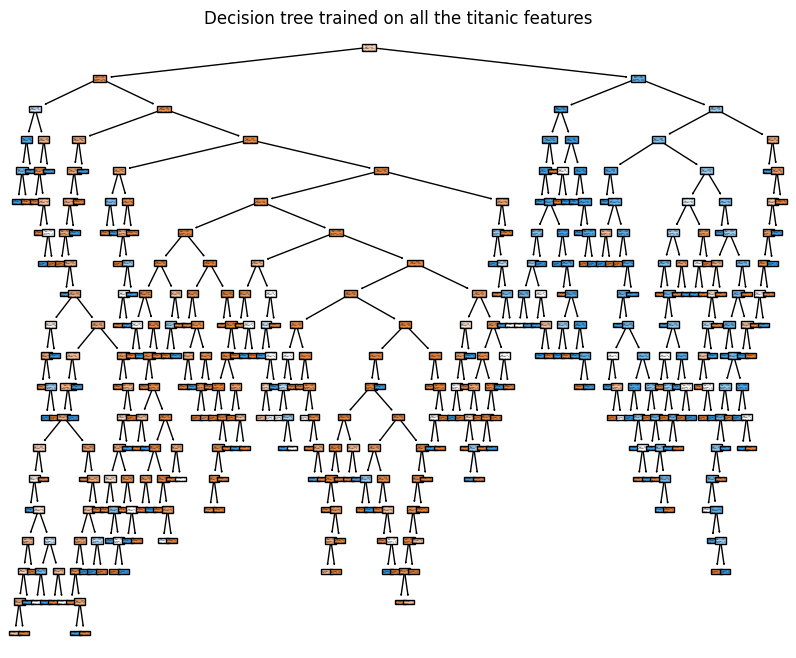

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(dtf, filled=True)
plt.title("Decision tree trained on all the titanic features")
plt.show()

# подберём оптимальные гиперпараметры
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

**Важные параметры:**
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [21]:
param_grid = {
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [22]:
from sklearn.model_selection import GridSearchCV
CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid, cv= 5)
CV_dtf.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

Узнаем найденные параметры

In [23]:
CV_dtf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}

In [24]:
CV_dtf.best_score_

np.float64(0.8638823082097629)

Попробуйте поменять параметр разбиения для перекрёсной проверки cv=10 или cv=12

In [25]:
from sklearn.model_selection import GridSearchCV
CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid, cv= 10)
CV_dtf.fit(X, Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [26]:
CV_dtf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'splitter': 'random'}

In [27]:
CV_dtf.best_score_

np.float64(0.8671462125660601)

Постройте модель DecitionTree с найденными оптимальными параметрами: обучите на X_train, проверьте на X_test

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth=5, max_features=None, splitter='random')
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))
df1=pd.crosstab(Y_test,pred_1)
df1

accuracy 0.8473282442748091
precision 0.8857142857142857
recall 0.6595744680851063


col_0,0,1
Survived,,
0,80,4
1,16,31


In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        84
           1       0.89      0.66      0.76        47

    accuracy                           0.85       131
   macro avg       0.86      0.81      0.82       131
weighted avg       0.85      0.85      0.84       131



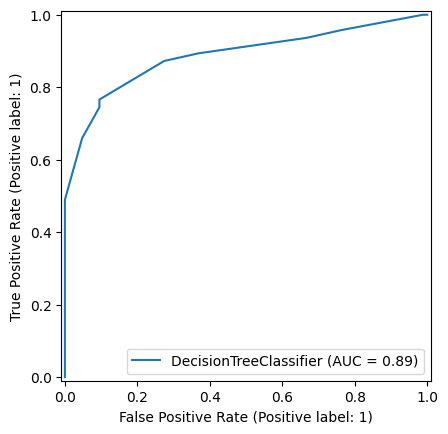

In [31]:
from sklearn.metrics import RocCurveDisplay
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

Постройте подобную процедуру ко всем моделям или к 2-м (RandomForest, ...)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

In [33]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
print(classification_report(Y_test,pred_1))
df2=pd.crosstab(Y_test,pred_2)
df2

accuracy 0.8320610687022901
precision 0.8205128205128205
recall 0.6808510638297872
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        84
           1       0.89      0.66      0.76        47

    accuracy                           0.85       131
   macro avg       0.86      0.81      0.82       131
weighted avg       0.85      0.85      0.84       131



col_0,0,1
Survived,,
0,77,7
1,15,32


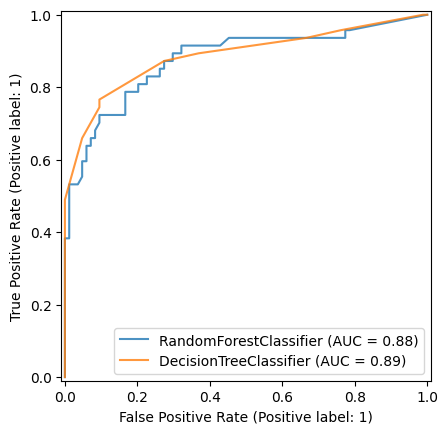

In [34]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

Выполним поиск оптимальных гиперпараметров

In [35]:
param_grid = {
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [36]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X, Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2']})

In [37]:
CV_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt'}

In [38]:
CV_rf.best_score_

np.float64(0.8693951849677042)

In [39]:
rf = RandomForestClassifier(bootstrap=True, max_features='sqrt', max_depth=6, criterion='entropy', random_state=0)
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

In [40]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
print(classification_report(Y_test,pred_2))
df2=pd.crosstab(Y_test,pred_2)
df2

accuracy 0.8625954198473282
precision 0.8717948717948718
recall 0.723404255319149
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131



col_0,0,1
Survived,,
0,79,5
1,13,34


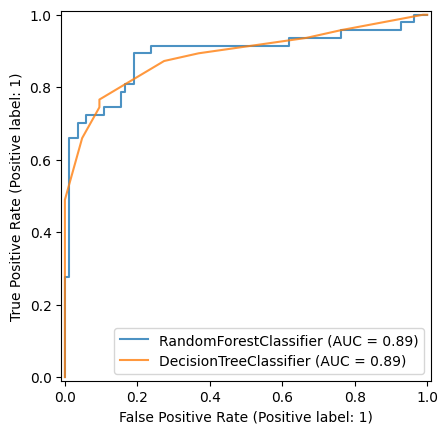

In [41]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

Обучите модели на полном наборе. Для тестирования используйте отдельный набор

In [42]:
from sklearn.preprocessing import StandardScaler
# Масштабируем признаки
scaler = StandardScaler().fit(X)
X_scaled=scaler.transform(X)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_scaled, Y, test_size = 0.1, random_state=5)

In [43]:
from sklearn.tree import ExtraTreeClassifier
et = ExtraTreeClassifier(random_state=0)
et.fit(X_train_scaled, Y_train_scaled)
pred_3=et.predict(X_test_scaled)

In [44]:
print('accuracy',accuracy_score(Y_test_scaled,pred_3))
print('precision',precision_score(Y_test_scaled,pred_3))
print('recall',recall_score(Y_test_scaled,pred_3))
print(classification_report(Y_test_scaled,pred_3))
df3=pd.crosstab(Y_test_scaled,pred_3)
df3

accuracy 0.8244274809160306
precision 0.7857142857142857
recall 0.7021276595744681
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        84
           1       0.79      0.70      0.74        47

    accuracy                           0.82       131
   macro avg       0.81      0.80      0.80       131
weighted avg       0.82      0.82      0.82       131



col_0,0,1
Survived,,
0,75,9
1,14,33


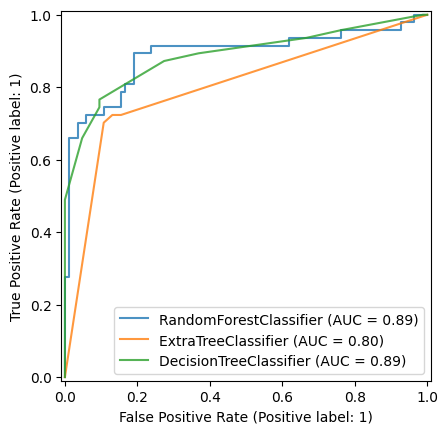

In [45]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
et_disp = RocCurveDisplay.from_estimator(et, X_test_scaled, Y_test_scaled, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [46]:
param_grid = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

In [47]:
CV_et = GridSearchCV(estimator=et, param_grid=param_grid, cv=5)
CV_et.fit(X_scaled, Y)

GridSearchCV(cv=5, estimator=ExtraTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [48]:
CV_et.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [49]:
CV_et.best_score_

np.float64(0.8661840835307537)

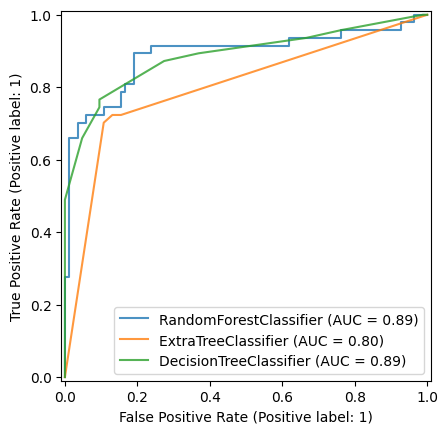

In [50]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
et_disp = RocCurveDisplay.from_estimator(et, X_test_scaled, Y_test_scaled, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [51]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier(random_state=0)
gpc.fit(X_train_scaled,Y_train_scaled)
pred_3=gpc.predict(X_test_scaled)

In [52]:
print('accuracy',accuracy_score(Y_test_scaled,pred_3))
print('precision',precision_score(Y_test_scaled,pred_3))
print('recall',recall_score(Y_test_scaled,pred_3))
df3=pd.crosstab(Y_test_scaled,pred_3)
df3

accuracy 0.8396946564885496
precision 0.825
recall 0.7021276595744681


col_0,0,1
Survived,,
0,77,7
1,14,33


In [53]:
print(classification_report(Y_test_scaled,pred_3))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.82      0.70      0.76        47

    accuracy                           0.84       131
   macro avg       0.84      0.81      0.82       131
weighted avg       0.84      0.84      0.84       131



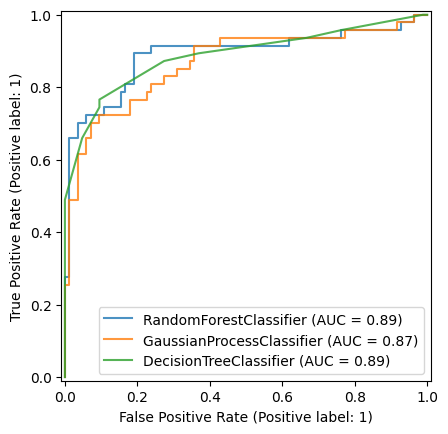

In [54]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
gpc_disp = RocCurveDisplay.from_estimator(gpc, X_test_scaled, Y_test_scaled, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [55]:
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier

param_grid = {
    'kernel': [RBF(), Matern()],
    'optimizer': ['fmin_l_bfgs_b'],
    'n_restarts_optimizer': [0, 1, 2],
}

In [57]:
CV_gpc = GridSearchCV(estimator=gpc, param_grid=param_grid, cv=10)
CV_gpc.fit(X_scaled, Y)

GridSearchCV(cv=10, estimator=GaussianProcessClassifier(random_state=0),
             param_grid={'kernel': [RBF(length_scale=1),
                                    Matern(length_scale=1, nu=1.5)],
                         'n_restarts_optimizer': [0, 1, 2],
                         'optimizer': ['fmin_l_bfgs_b']})

In [58]:
CV_dtf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'splitter': 'random'}

In [59]:
CV_dtf.best_score_

np.float64(0.8671462125660601)

In [60]:
gpc = GaussianProcessClassifier(kernel= None, max_iter_predict= 50, n_jobs= None, n_restarts_optimizer= 0, optimizer= 'fmin_l_bfgs_b', random_state= 0, warm_start= False, multi_class= 'one_vs_rest')
gpc.fit(X_train_scaled,Y_train_scaled)
pred_3=gpc.predict(X_test_scaled)

In [61]:
print('accuracy',accuracy_score(Y_test_scaled,pred_3))
print('precision',precision_score(Y_test_scaled,pred_3))
print('recall',recall_score(Y_test_scaled,pred_3))
df3=pd.crosstab(Y_test_scaled,pred_3)
df3

accuracy 0.8396946564885496
precision 0.825
recall 0.7021276595744681


col_0,0,1
Survived,,
0,77,7
1,14,33


In [62]:
print(classification_report(Y_test_scaled,pred_3))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.82      0.70      0.76        47

    accuracy                           0.84       131
   macro avg       0.84      0.81      0.82       131
weighted avg       0.84      0.84      0.84       131



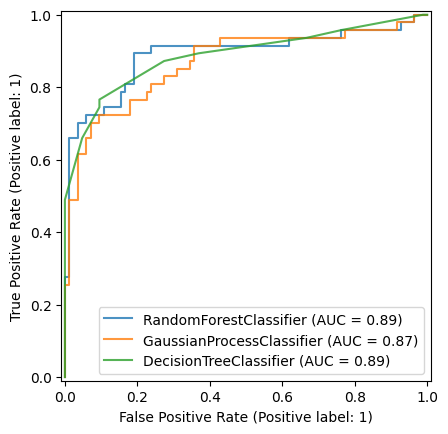

In [63]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
gpc_disp = RocCurveDisplay.from_estimator(gpc, X_test_scaled, Y_test_scaled, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

Уменьшите количество признаков (см. матрицу корреляции)
Постройте модели и проанализируйте результаты

In [64]:
X_old = X
Y_old = Y
X = X.drop(['Age', 'SibSp', 'Parch'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [65]:
dtf = DecisionTreeClassifier(random_state=0)
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

In [66]:
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))
df1=pd.crosstab(Y_test,pred_1)
df1

accuracy 0.8396946564885496
precision 0.7954545454545454
recall 0.7446808510638298


col_0,0,1
Survived,,
0,75,9
1,12,35


In [67]:
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        84
           1       0.80      0.74      0.77        47

    accuracy                           0.84       131
   macro avg       0.83      0.82      0.82       131
weighted avg       0.84      0.84      0.84       131



In [68]:
param_grid = {
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [69]:
CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid, cv= 10)
CV_dtf.fit(X, Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [70]:
CV_dtf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'splitter': 'best'}

In [71]:
CV_dtf.best_score_

np.float64(0.8663769817968291)

In [72]:
dtf = DecisionTreeClassifier(random_state=0, criterion = 'entropy', max_depth=4, max_features=None, splitter='best')
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

In [73]:
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))
df1=pd.crosstab(Y_test,pred_1)
df1

accuracy 0.8549618320610687
precision 0.868421052631579
recall 0.7021276595744681


col_0,0,1
Survived,,
0,79,5
1,14,33


In [74]:
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        84
           1       0.87      0.70      0.78        47

    accuracy                           0.85       131
   macro avg       0.86      0.82      0.83       131
weighted avg       0.86      0.85      0.85       131



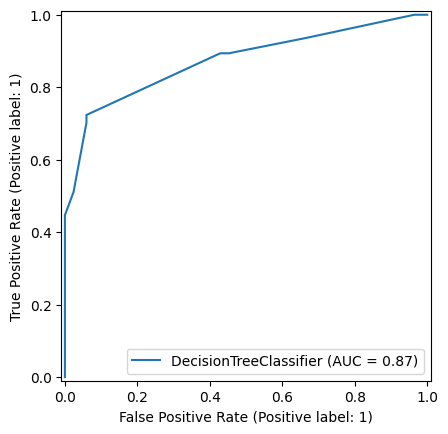

In [75]:
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

In [76]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

In [77]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
print(classification_report(Y_test,pred_1))
df2=pd.crosstab(Y_test,pred_2)
df2

accuracy 0.8473282442748091
precision 0.8
recall 0.7659574468085106
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        84
           1       0.87      0.70      0.78        47

    accuracy                           0.85       131
   macro avg       0.86      0.82      0.83       131
weighted avg       0.86      0.85      0.85       131



col_0,0,1
Survived,,
0,75,9
1,11,36


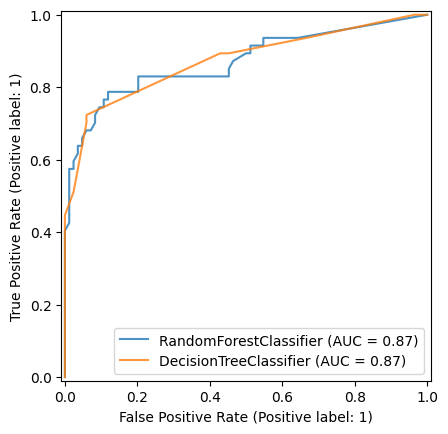

In [78]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [79]:
param_grid = {
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [80]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X, Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2']})

In [81]:
CV_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt'}

In [82]:
CV_rf.best_score_

np.float64(0.8678919553728713)

In [83]:
rf = RandomForestClassifier(random_state=0, bootstrap=False, max_features='sqrt', max_depth=6, criterion='gini')
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

In [84]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
print(classification_report(Y_test,pred_2))
df2=pd.crosstab(Y_test,pred_2)
df2

accuracy 0.8625954198473282
precision 0.8717948717948718
recall 0.723404255319149
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131



col_0,0,1
Survived,,
0,79,5
1,13,34


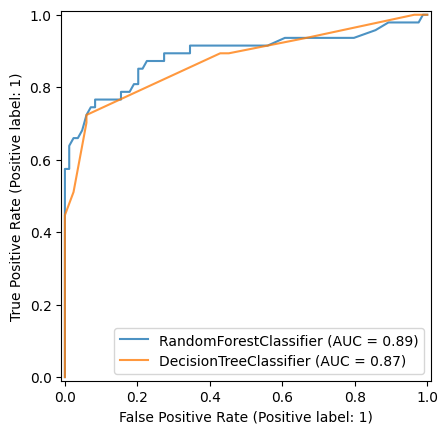

In [85]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

Увеличьте количество признаков
Постройте модели и проанализируйте результаты

In [86]:
X = X_old
Y = Y_old

In [87]:
X_old = X
Y_old = Y
X = X.drop(['Age', 'SibSp', 'Parch'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [88]:
from sklearn.preprocessing import PolynomialFeatures, scale
poly = PolynomialFeatures(2, interaction_only=True)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [89]:
dtf = DecisionTreeClassifier(random_state=0)
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

In [90]:
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))
df1=pd.crosstab(Y_test,pred_1)
df1

accuracy 0.8320610687022901
precision 0.7777777777777778
recall 0.7446808510638298


col_0,0,1
Survived,,
0,74,10
1,12,35


In [91]:
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        84
           1       0.78      0.74      0.76        47

    accuracy                           0.83       131
   macro avg       0.82      0.81      0.82       131
weighted avg       0.83      0.83      0.83       131



In [92]:
param_grid = {
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [93]:
CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid, cv= 10)
CV_dtf.fit(X, Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [94]:
CV_dtf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'splitter': 'best'}

In [95]:
CV_dtf.best_score_

np.float64(0.8663769817968291)

In [96]:
dtf = DecisionTreeClassifier(random_state=0, criterion = 'entropy', max_depth=4, max_features=None, splitter='best')
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

In [97]:
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))
df1=pd.crosstab(Y_test,pred_1)
df1

accuracy 0.8549618320610687
precision 0.8888888888888888
recall 0.6808510638297872


col_0,0,1
Survived,,
0,80,4
1,15,32


In [98]:
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        84
           1       0.89      0.68      0.77        47

    accuracy                           0.85       131
   macro avg       0.87      0.82      0.83       131
weighted avg       0.86      0.85      0.85       131



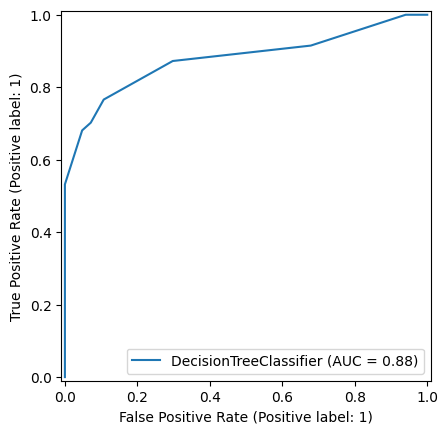

In [99]:
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

In [100]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

In [101]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
df2=pd.crosstab(Y_test,pred_2)
df2

accuracy 0.8473282442748091
precision 0.8
recall 0.7659574468085106


col_0,0,1
Survived,,
0,75,9
1,11,36


In [102]:
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        84
           1       0.89      0.68      0.77        47

    accuracy                           0.85       131
   macro avg       0.87      0.82      0.83       131
weighted avg       0.86      0.85      0.85       131



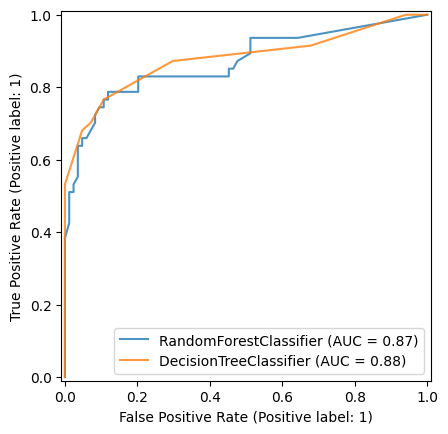

In [103]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [104]:
param_grid = {
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [105]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X, Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2']})

In [106]:
CV_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt'}

In [107]:
CV_rf.best_score_

np.float64(0.8678919553728713)

In [108]:
rf = RandomForestClassifier(random_state=0, bootstrap=False, max_features='sqrt', max_depth=6, criterion='gini')
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

In [109]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
print(classification_report(Y_test,pred_2))
df2=pd.crosstab(Y_test,pred_2)
df2

accuracy 0.8625954198473282
precision 0.8717948717948718
recall 0.723404255319149
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131



col_0,0,1
Survived,,
0,79,5
1,13,34


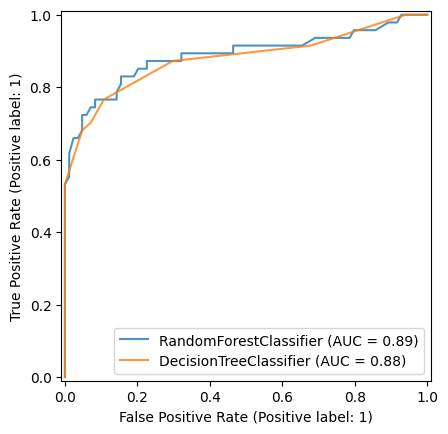

In [110]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

randomizedsearch

1. Для Decision Tree

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Определение распределений параметров
param_dist_dt = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Инициализация RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_distributions=param_dist_dt,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

# Обучение
random_search_dt.fit(X_train, Y_train)

# Лучшие параметры
print("Лучшие параметры для DecisionTree:", random_search_dt.best_params_)

Лучшие параметры для DecisionTree: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 8, 'min_samples_split': 12, 'splitter': 'random'}


2. Для Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

random_search_rf.fit(X_train, Y_train)

print("Лучшие параметры для RandomForest:", random_search_rf.best_params_)

Лучшие параметры для RandomForest: {'bootstrap': False, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 159}


3. Для Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform

param_dist_lr = {
    'C': loguniform(1e-4, 1e2),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search_lr = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_distributions=param_dist_lr,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

random_search_lr.fit(X_train, Y_train)

print("Лучшие параметры для LogisticRegression:", random_search_lr.best_params_)

Лучшие параметры для LogisticRegression: {'C': np.float64(18.038281944267133), 'penalty': 'l1', 'solver': 'liblinear'}


4. Оценка моделей


In [119]:
# Для Decision Tree
best_dt = random_search_dt.best_estimator_
pred_dt = best_dt.predict(X_test)
print(classification_report(Y_test, pred_dt))

# Для Random Forest
best_rf = random_search_rf.best_estimator_
pred_rf = best_rf.predict(X_test)
print(classification_report(Y_test, pred_rf))

# Для Logistic Regression
best_lr = random_search_lr.best_estimator_
pred_lr = best_lr.predict(X_test)
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        84
           1       0.89      0.66      0.76        47

    accuracy                           0.85       131
   macro avg       0.86      0.81      0.82       131
weighted avg       0.85      0.85      0.84       131

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.82      0.70      0.76        47

    accuracy                           0.84       131
   macro avg       0.84      0.81      0.82       131
weighted avg       0.84      0.84      0.84       131



5. Визуализация ROC-кривых

<Figure size 1000x800 with 0 Axes>

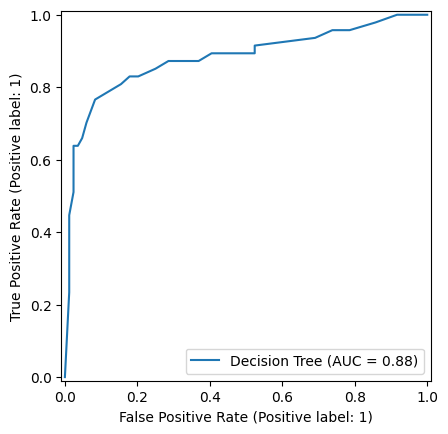

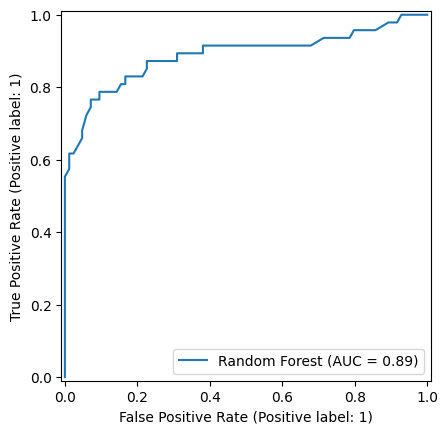

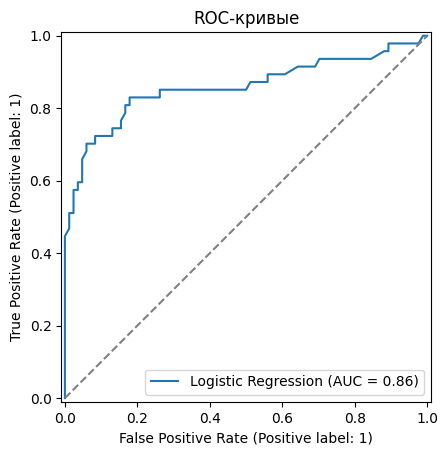

In [120]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))
models = {
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'Logistic Regression': best_lr
}

for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, Y_test, name=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC-кривые')
plt.show()